In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
pignone_data= pd.read_csv("misure_pignone.csv")
corona_data= pd.read_csv("misure_corona.csv")


pignone= np.array(pignone_data['denti'])
corona= np.array(corona_data['denti'])


rapporti = corona[:, np.newaxis] / pignone

tabella= pd.DataFrame(rapporti, columns= pignone, index=corona)

tabella= tabella.round(decimals=3)

tabella.to_csv("tabella_rapporti.csv")

tabella

,11,12,13
48,4.364,4.000,3.692
49,4.455,4.083,3.769
50,4.545,4.167,3.846
51,4.636,4.250,3.923
52,4.727,4.333,4.000
53,4.818,4.417,4.077


In [31]:
df_trasposto = tabella.transpose().reset_index()

colonne= ['pignone'] + [str(x) for x in corona]
df_trasposto.columns = colonne

df_finale = pd.melt(df_trasposto, 
                    id_vars=['pignone'], 
                    var_name='corona', 
                    value_name='rapporto')

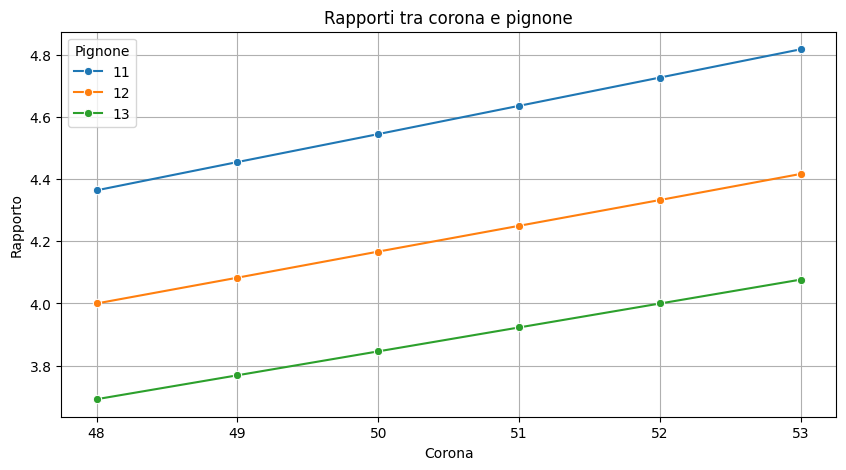

In [32]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_finale, 
             x='corona', 
             y='rapporto', 
             hue='pignone', 
             marker='o',
             palette='tab10')

plt.title('Rapporti tra corona e pignone')
plt.xlabel('Corona')
plt.ylabel('Rapporto')
plt.legend(title='Pignone')

plt.grid(True)

plt.savefig('grafico_rapporti.png')

plt.show()
